In [1]:
#라이브러리 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#사전 훈련된 모델 내려받기
model = ResNet50(include_top= True,     #네트워크 상단에 완전연결층 포함 여부
                 weights='imagenet',    #가중치, None과 imagenet 지정 가능
                 input_tensor=None,     #입력데이터의 텐서(layers.Input()의 출력)
                 input_shape=None,      #입력이미지에 대한 텐서 크기
                 pooling=None,          #None은 마지막 합성곱층 출력, avg는 마지막 합성곱층에 글로벌 평균 풀링 추가, max는 마지막 합성곱층에 골로벌 최대 풀링 추가
                 classes=1000) 

102973440/102967424 [==============================] - 1s 0us/step


In [3]:
#네트워크 구조 확인
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
#모델에 밀집층 추가하기
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense (Dense)                (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [11]:
#훈련 환경 설정
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [12]:
#모델 훈련
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "../ch05/data/catanddog/train"
valid_dir = "../ch05/data/catanddog/validation"


train = ImageDataGenerator(                 #일부 이미지만 사용하여 학습 예정이여서 데이터 조금씩 변형시켜 복사시키는 클래스
                  rescale=1./255,           #0~1 범위로 변환
                  rotation_range=10,        #0~10도 범위에서 원본 이미지 회전
                  width_shift_range=0.1,    #수평 이동 범위, 0.1은 10픽셀
                  height_shift_range=0.1,   #수직 이동 범위
                  shear_range=0.1,          #임의로 변형시키는 범위, 0.1은 0.1라디안 내외로 시계 반대 방향으로 이미지 변환
                  zoom_range=0.1)           #확대/축소 범위

train_generator = train.flow_from_directory(train_dir,   #훈련 이미지 경로
                                                    target_size=(image_height, image_width),    #이미지 크기, 이 크기로 모든 이미지가 조정된다.
                                                    color_mode="rgb",           #grayscale, rgb 2개가 있다.
                                                    batch_size=BATCH_SIZE,      #배치당 generator에서 생성할 이미지 개수
                                                    seed=1,                     #임의로 섞기 위한 랜덤 정수
                                                    shuffle=True,               #이미지 섞기
                                                    class_mode="categorical")   #예측 클래스가 2개면 binary 그렇지 않으면 catecorical로 선택

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,  #학습에 사용되는 데이터셋
          epochs=10,    #학습에 반복 횟수
          validation_data=valid_generator,  #검증 데이터셋 설정
          verbose=2)    #0=출력 안하기, 1=훈련 진행도를 막대로 표시, 2=미니배치마다 훈련 진행도 출력

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 118s - loss: 0.6938 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
13/13 - 116s - loss: 0.6938 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
13/13 - 117s - loss: 0.6937 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
13/13 - 117s - loss: 0.6937 - accuracy: 0.4727 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
13/13 - 128s - loss: 0.6934 - accuracy: 0.4727 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 118s - loss: 0.6933 - accuracy: 0.4156 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 115s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 118s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 116s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/10
13/13 -

Text(0.5, 1.0, 'error')

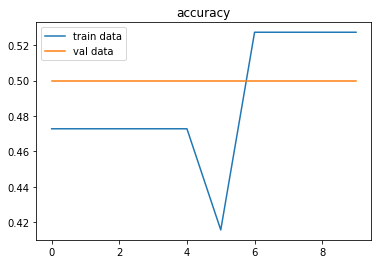

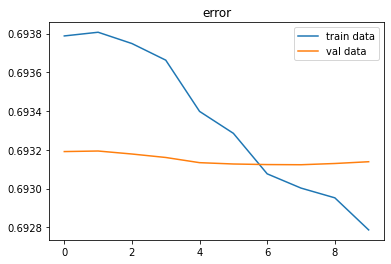

In [14]:
#모델 정확도 시각화
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="train data")
plt.plot(epochs, val_accuracy, label="val data")
plt.legend()
plt.title('accuracy')
plt.figure()


plt.plot(epochs, loss, label="train data")
plt.plot(epochs, val_loss, label="val data")
plt.legend()
plt.title('error')

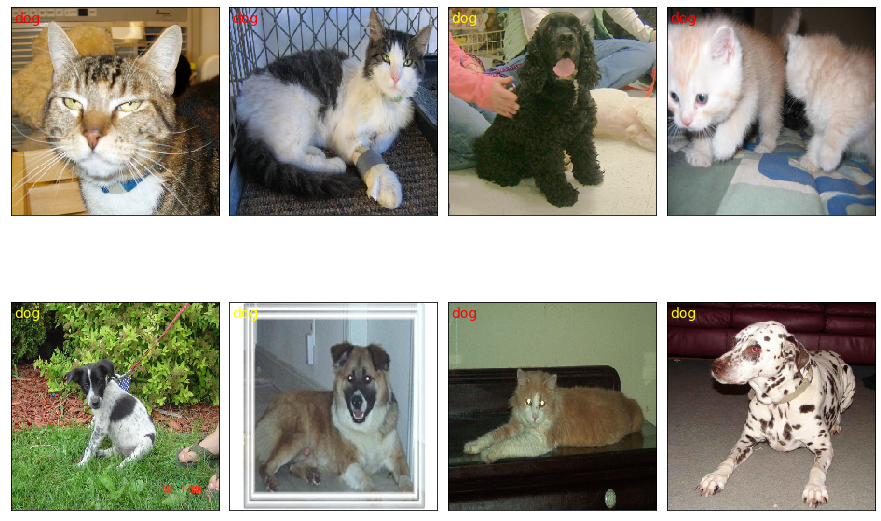

In [15]:
#훈련된 모델의 예측
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)